<a href="https://colab.research.google.com/github/srvchetry/SauravChetry/blob/master/range_with_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Last closing price: $471.35
Predicted next week's return: 4.45%
Predicted next week's closing price: $492.33


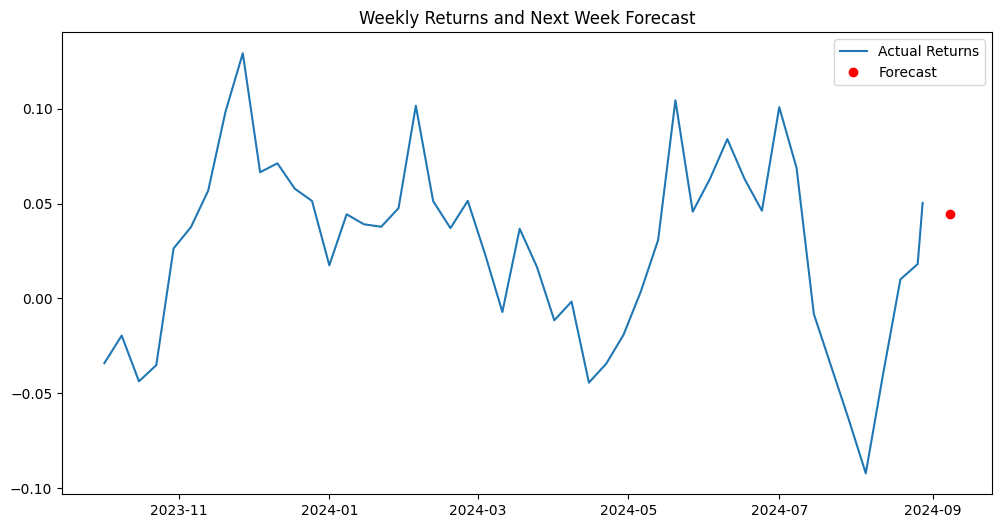

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('qqq_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate weekly returns
data['Weekly_Return'] = data['Close'].pct_change(periods=5)  # 5 periods for weekly return

# Remove NaN values
data = data.dropna()

# Fit ARIMA model
model = ARIMA(data['Weekly_Return'], order=(1,1,1))  # (p,d,q) order
results = model.fit()

# Forecast next week's return
forecast = results.forecast(steps=1)
next_week_return = forecast.values[0]

# Calculate the predicted price
last_price = data['Close'].iloc[-1]
predicted_price = last_price * (1 + next_week_return)

print(f"Last closing price: ${last_price:.2f}")
print(f"Predicted next week's return: {next_week_return:.2%}")
print(f"Predicted next week's closing price: ${predicted_price:.2f}")

# Plot the actual returns and the forecast
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Weekly_Return'], label='Actual Returns')
plt.plot(pd.date_range(start=data.index[-1], periods=2, freq='W')[1:], forecast, 'ro', label='Forecast')
plt.title('Weekly Returns and Next Week Forecast')
plt.legend()
plt.show()

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to load CSV file
def load_csv_file():
    file_path = input("Please enter the full path to your CSV file: ")
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        raise ValueError("The file is empty.")
    except pd.errors.ParserError:
        raise ValueError("Error parsing the file. Please check the file format.")

# Load the data
df = load_csv_file()

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate weekly returns
df['Weekly_Return'] = df['Close'].pct_change()

# Remove the first row (NaN)
df = df.dropna()

# Fit SARIMA model
model = SARIMAX(df['Weekly_Return'], order=(1,1,1), seasonal_order=(1,1,1,52))
results = model.fit()

# Forecast next week's return
forecast = results.get_forecast(steps=1)
next_week_return = forecast.predicted_mean.values[0]

# Get the 99.9% confidence interval
confidence_interval = forecast.conf_int(alpha=0.001)

# Calculate the predicted price
last_price = df['Close'].iloc[-1]
predicted_price = last_price * (1 + next_week_return)

# Calculate predicted price range based on confidence interval
price_lower = last_price * (1 + confidence_interval.iloc[0, 0])
price_upper = last_price * (1 + confidence_interval.iloc[0, 1])

# Calculate RMSE
df['Predicted_Return'] = results.predict(start=df.index[0], end=df.index[-1])
rmse = sqrt(mean_squared_error(df['Weekly_Return'], df['Predicted_Return']))

print(f"Last closing price: ${last_price:.2f}")
print(f"Predicted next week's return: {next_week_return:.2%}")
print(f"Predicted next week's closing price: ${predicted_price:.2f}")
print(f"99.9% Confidence Interval for next week's return: [{confidence_interval.iloc[0, 0]:.2%}, {confidence_interval.iloc[0, 1]:.2%}]")
print(f"99.9% Confidence Interval for next week's price: [${price_lower:.2f}, ${price_upper:.2f}]")
print(f"RMSE: {rmse:.4f}")



Please enter the full path to your CSV file: /content/qqq_weekly_29082024.csv
Last closing price: $471.35
Predicted next week's return: -1.89%
Predicted next week's closing price: $462.44
99.9% Confidence Interval for next week's return: [-13.46%, 9.68%]
99.9% Confidence Interval for next week's price: [$407.91, $516.98]
RMSE: 0.0421
